In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats

In [2]:
# Resource files
s_state = "Illinois"

csvfile_list = [f'./Resources/{s_state}/Alcoholic_Beverages_Sales_Tax.csv',
                f'./Resources/{s_state}/Alcoholic_Beverages_License.csv',
                f'./Resources/{s_state}/Tobacco_Products_Sales_Tax.csv',
                f'./Resources/{s_state}/General_Sales_and_Gross_Receipts_Taxes.csv',
                f'./Resources/{s_state}/Other_Selective_Sales_and_Gross_Receipts_Taxes.csv',
                f'./Resources/{s_state}/Total_Taxes.csv' ]
csvfile_total = "./Outputs/Output_total.csv"  # The google sheet

# Output files
csvfile_output = './Outputs/Output_' + s_state + '.csv'
pngfile_tax_curve = './Outputs/Tax_curve_' + s_state + '.png'
pngfile_tax_pie   = './Outputs/Tax_pie_' + s_state


In [3]:
# Step-1
# Input  :    Other States’ Marijuana Sales Taxes  (Historical Data)  -->
# Output :    Marijuana Sales Taxes Statistic
# Method :    Induction

In [4]:
# Get statistic data of other States
df_others = pd.read_csv(csvfile_total)
#df_cache = df_others.sort_values("Year")
df_others.head()

,Year,State,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax,Tobacco's Share of Total Sales Tax %,Alchohol's Share of Total Sales Tax %,Marijuana's Share of Total Sales Tax %,Unnamed: 10
0,2013,California,1.428600e+11,23729375000,833126000,354297000,0,3.510948,1.493073,0.0,NaN
1,2014,California,1.578750e+11,25756551000,832379000,357373000,0,3.231718,1.387503,0.0,NaN
2,2015,California,1.617590e+11,26967969000,840034000,368699000,0,3.114932,1.367174,0.0,NaN
3,2016,California,1.693840e+11,25187502000,1184961000,374608000,0,4.704559,1.487277,0.0,NaN
4,2017,California,1.784410e+11,25155161000,2090908000,376735000,0,8.312044,1.497645,0.0,NaN


In [5]:
# Get the Average sales tax share of (Tobacco, Alcohol, Marij) of these States
# from the first year in which Marij sales tax was created

lt_states = []
n_year_count = 0
lt_tobacco_tax = []
lt_alcohol_tax = []
lt_marij_tax   = []
lt_state_count = []

for index, row in df_others.iterrows():
        
    # We ONLY count the State that has the Marij sales tax in this year
    if row["Marijuana's Share of Total Sales Tax %"] != 0:
            
        # This is the first year for the State to have Marij sales tax
        if row["State"] not in lt_states:
            # Count the year from 0
            n_year_count = 0
            lt_states.append(row["State"])

        # This is NOT the first year for the State to have Marij sales tax
        else:
            # Count the year
            n_year_count += 1

        # If this year has the data
        if n_year_count < len(lt_marij_tax):
            
            # Add the sales tax share data to this year's total data
            lt_marij_tax[n_year_count]   += row["Marijuana's Share of Total Sales Tax %"]
            lt_tobacco_tax[n_year_count] += row["Tobacco's Share of Total Sales Tax %"]
            lt_alcohol_tax[n_year_count] += row["Alchohol's Share of Total Sales Tax %"]
            
            # Count the state
            lt_state_count[n_year_count] += 1
               
        # If this year has no data yet
        else:
                
            # Initiate the sales tax share data of this year
            lt_marij_tax.append(row["Marijuana's Share of Total Sales Tax %"])
            lt_tobacco_tax.append(row["Tobacco's Share of Total Sales Tax %"])
            lt_alcohol_tax.append(row["Alchohol's Share of Total Sales Tax %"])

            # Count the state
            lt_state_count.append(1)


In [6]:
# Make the final reference dataframe

lt_year_count = np.arange(1, len(lt_marij_tax)+1, 1)

df_avg_tax = pd.DataFrame({"Years"      : lt_year_count,
                           "State Count": lt_state_count,
                           "Marij Sales Tax Share (Sum)%"  : lt_marij_tax,
                           "Tobacco Sales Tax Share (Sum)%": lt_tobacco_tax,
                           "Alcohol Sales Tax Share (Sum)%": lt_alcohol_tax })

df_avg_tax["Marij Sales Tax Share (Avg)%"]   = df_avg_tax["Marij Sales Tax Share (Sum)%"] / \
                                               df_avg_tax["State Count"]
df_avg_tax["Tobacco Sales Tax Share (Avg)%"] = df_avg_tax["Tobacco Sales Tax Share (Sum)%"] / \
                                               df_avg_tax["State Count"]
df_avg_tax["Alcohol Sales Tax Share (Avg)%"] = df_avg_tax["Alcohol Sales Tax Share (Sum)%"] / \
                                               df_avg_tax["State Count"]

df_avg_tax["Marij v. Tobacco %"] = df_avg_tax["Marij Sales Tax Share (Avg)%"] *100 / \
                                   df_avg_tax["Tobacco Sales Tax Share (Avg)%"]
df_avg_tax["Marij v. Alcohol %"] = df_avg_tax["Marij Sales Tax Share (Avg)%"] *100 / \
                                   df_avg_tax["Alcohol Sales Tax Share (Avg)%"]

df_avg_tax

,Years,State Count,Marij Sales Tax Share (Sum)%,Tobacco Sales Tax Share (Sum)%,Alcohol Sales Tax Share (Sum)%,Marij Sales Tax Share (Avg)%,Tobacco Sales Tax Share (Avg)%,Alcohol Sales Tax Share (Avg)%,Marij v. Tobacco %,Marij v. Alcohol %
0,1,4,5.448630,20.569238,6.607816,1.362158,5.142310,1.651954,26.489216,82.457355
1,2,3,7.465612,11.892650,4.906198,2.488537,3.964217,1.635399,62.775006,152.166967
2,3,1,5.367475,5.738841,1.441641,5.367475,5.738841,1.441641,93.528894,372.316944
3,4,1,6.079343,4.792332,1.302531,6.079343,4.792332,1.302531,126.855628,466.732970


In [7]:
# Step-2
# Input  :    Illinois's Historical Sales Taxes    -->
# Output :    (Total, Tobacco, Alcohol) Sales Taxes forecast in the next years
# Method :    Regression

In [8]:
# Get the tax data from files
n_unit = 1000000    # Millions of USD
n_count = -1
for file_name in csvfile_list:
    n_count += 1
    # Get tax data
    df_tax = pd.read_csv(file_name)
    # Get tax name
    s_tax_name = file_name.split("/")[3].split(".csv")[0]
    # Merge data
    if (n_count == 0):
        df_taxes = df_tax.rename(columns={"Value":s_tax_name})
        df_taxes[s_tax_name] = pd.to_numeric(df_taxes[s_tax_name]) * n_unit
    else:
        df_taxes[s_tax_name] = df_tax["Value"]
        df_taxes[s_tax_name] = pd.to_numeric(df_taxes[s_tax_name]) * n_unit

df_taxes.head()

,Period,Alcoholic_Beverages_Sales_Tax,Alcoholic_Beverages_License,Tobacco_Products_Sales_Tax,General_Sales_and_Gross_Receipts_Taxes,Other_Selective_Sales_and_Gross_Receipts_Taxes,Total_Taxes
0,Q1-2010,59000000.0,3000000.0,135000000.0,1.617000e+09,307000000.0,7.092000e+09
1,Q2-2010,65000000.0,4000000.0,146000000.0,1.776000e+09,300000000.0,7.771000e+09
2,Q3-2010,71000000.0,3000000.0,147000000.0,1.753000e+09,730000000.0,7.128000e+09
3,Q4-2010,68000000.0,3000000.0,147000000.0,2.022000e+09,346000000.0,7.250000e+09
4,Q1-2011,63000000.0,3000000.0,145000000.0,1.757000e+09,125000000.0,7.625000e+09


In [9]:
# Make the plot dataframe
df_plot = df_taxes[["Period","Total_Taxes"]]
df_plot = df_plot.rename(columns={"Total_Taxes":"Total Revenue"})
df_plot["Total Sales Tax"] = df_taxes["General_Sales_and_Gross_Receipts_Taxes"] + \
                             df_taxes["Other_Selective_Sales_and_Gross_Receipts_Taxes"]
df_plot["Total Tobacco Sales Tax"] = df_taxes["Tobacco_Products_Sales_Tax"]
df_plot["Total Alcohol Sales Tax"] = df_taxes["Alcoholic_Beverages_Sales_Tax"] + \
                                     df_taxes["Alcoholic_Beverages_License"]
df_plot["Total Marijuana Sales Tax"] = 0
df_plot = df_plot.set_index("Period")
df_plot = df_plot.dropna(how='any')
df_plot.head()

,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax
Period,,,,,
Q1-2010,7.092000e+09,1.924000e+09,135000000.0,62000000.0,0
Q2-2010,7.771000e+09,2.076000e+09,146000000.0,69000000.0,0
Q3-2010,7.128000e+09,2.483000e+09,147000000.0,74000000.0,0
Q4-2010,7.250000e+09,2.368000e+09,147000000.0,71000000.0,0
Q1-2011,7.625000e+09,1.882000e+09,145000000.0,66000000.0,0


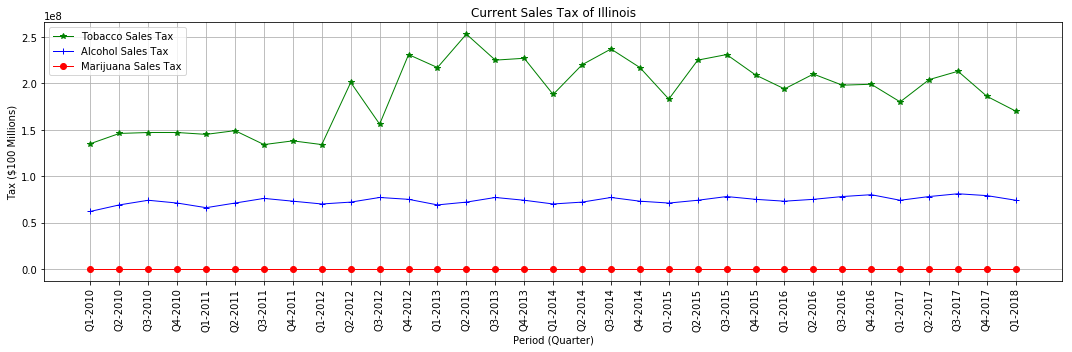

In [10]:
# Plot the data
x_axis = np.arange(len(df_plot))
lt_period = df_plot.index.tolist()
ss_total_sales_tax   = df_plot["Total Sales Tax"]
ss_tobacco_sales_tax = df_plot["Total Tobacco Sales Tax"]
ss_alcohol_sales_tax = df_plot["Total Alcohol Sales Tax"]
ss_marij_sales_tax   = df_plot["Total Marijuana Sales Tax"]

# Create a handle for each plot
#ss_total_sales_tax.plot(label="Total Sales Tax",
#                        marker="o", color="blue", linewidth=1)
ss_tobacco_sales_tax.plot(label="Tobacco Sales Tax",
                          marker="*", color="Green", linewidth=1, figsize=(15,5))
ss_alcohol_sales_tax.plot(label="Alcohol Sales Tax",
                          marker="+", color="blue", linewidth=1, figsize=(15,5))
ss_marij_sales_tax.plot(label="Marijuana Sales Tax",
                        marker="o", color="Red", linewidth=1, figsize=(15,5))

# Set labels
plt.xticks(x_axis, lt_period, rotation="vertical")
plt.title(f"Current Sales Tax of {s_state}")
plt.xlabel("Period (Quarter)")
plt.ylabel("Tax ($100 Millions)")
plt.legend()

# Set sizes
plt.grid()
plt.tight_layout()

# Save and show
plt.savefig(pngfile_tax_curve)
plt.show()


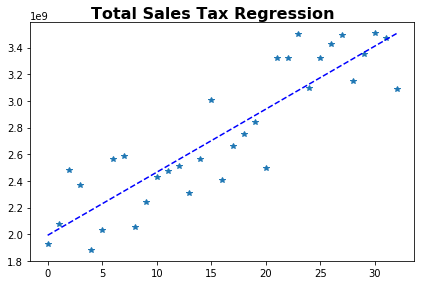

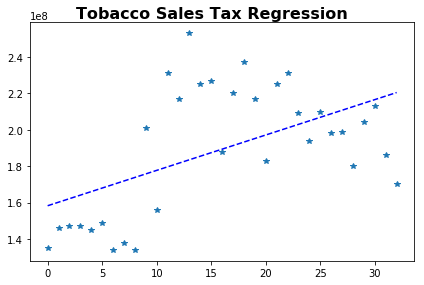

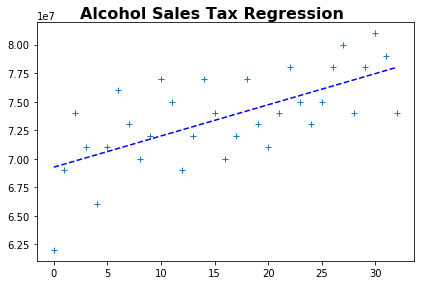

In [11]:
# Use Regression to forcast the sales taxes (Total, Tobacco, Alcohol) in next years

x_axis = np.arange(0, len(df_plot), 1)
y_axis_ttl = [y for y in ss_total_sales_tax.tolist()]
y_axis_tbc = [y for y in ss_tobacco_sales_tax.tolist()]
y_axis_alc = [y for y in ss_alcohol_sales_tax.tolist()]

# Total Sales Tax forecasting
(slope_ttl, intercept_ttl, _, _, _) = stats.linregress(x_axis, y_axis_ttl)
fit_ttl = slope_ttl * x_axis + intercept_ttl
# Plot data
fig_ttl, ax_ttl = plt.subplots()
fig_ttl.suptitle("Total Sales Tax Regression", fontsize=16, fontweight="bold")
ax_ttl.plot(x_axis, y_axis_ttl, linewidth=0, marker='*')
ax_ttl.plot(x_axis, fit_ttl, 'b--')
plt.tight_layout()

# Tobacco Sales Tax forecasting
(slope_tbc, intercept_tbc, _, _, _) = stats.linregress(x_axis, y_axis_tbc)
fit_tbc = slope_tbc * x_axis + intercept_tbc
# Plot data
fig_tbc, ax_tbc = plt.subplots()
fig_tbc.suptitle("Tobacco Sales Tax Regression", fontsize=16, fontweight="bold")
ax_tbc.plot(x_axis, y_axis_tbc, linewidth=0, marker='*')
ax_tbc.plot(x_axis, fit_tbc, 'b--')
plt.tight_layout()

# Alcohol Sales Tax forecasting
(slope_alc, intercept_alc, _, _, _) = stats.linregress(x_axis, y_axis_alc)
fit_alc = slope_alc * x_axis + intercept_alc
# Plot data
fig_alc, ax_alc = plt.subplots()
fig_alc.suptitle("Alcohol Sales Tax Regression", fontsize=16, fontweight="bold")
ax_alc.plot(x_axis, y_axis_alc, linewidth=0, marker='+')
ax_alc.plot(x_axis, fit_alc, 'b--')
plt.tight_layout()

# Plot
plt.show()


In [12]:
# Get the sales taxes (Total, Tobacco, Alcohol) in assumption for the next years
# 4 Years (len(df_avg_tax)); 4 Quarters in each year
x_forecast = np.arange(len(df_plot), len(df_plot)+len(df_avg_tax)*4, 1)

y_forecast_ttl = [slope_ttl * x + intercept_ttl for x in x_forecast]
y_forecast_tbc = [slope_tbc * x + intercept_tbc for x in x_forecast]
y_forecast_alc = [slope_alc * x + intercept_alc for x in x_forecast]


In [13]:
# Step-3
# Input  :    (Total, Tobacco, Alcohol) Sales Taxes Forecast of Illinois  +
#                     Marijuana Statistic Data of other States    -->
# Output :    Illinois Marijuana Sales Taxes Forecast in the Next Years
# Method :    Analogy

In [14]:
# 1. Copy the historic data
df_forecast = df_plot[:]
df_forecast.reset_index(inplace=True)
del(df_forecast["Total Revenue"])

# This is the final dataframe
df_forecast = df_forecast.rename(columns={"Total Marijuana Sales Tax": 
                                          "Marijuana Sales Tax (Forecast on Tobacco)"})
df_forecast["Marijuana Sales Tax (Forecast on Alcohol)"] = 0
df_forecast["Marijuana Sales Tax (Forecast Avg)"]        = 0
df_forecast["Total Sales Tax (Forecast w. Marijuana)"]   = df_forecast["Total Sales Tax"]
    
# Add Quarter by Quarter
n_year_count = 0
for n_quarter in np.arange(len(x_forecast)):
    
    # Get the index and "Period" of the last row
    index = len(df_forecast)-1
    s_last_quarter = df_forecast.iloc[index, 0]
    
    # Get the last Quarter and Year
    s_quarter, s_year = s_last_quarter.split("-")
    s_quarter = s_quarter.split("Q")[1]
    
    # Add one Quarter
    if s_quarter == "4":
        s_quarter = 1
        s_year = int(s_year) + 1
    else:
        s_quarter = int(s_quarter) + 1
    s_new_quarter = f"Q{s_quarter}-{s_year}"
    
# 2. Add the forecasting sales taxes (Total, Tobacco, Alcohol) of the new Quarter
    forecast_ttl = y_forecast_ttl[n_quarter]
    forecast_tbc = y_forecast_tbc[n_quarter]
    forecast_alc = y_forecast_alc[n_quarter]

# 3. Add the forecasting sales taxes (Marij) of the new Quarter
    # Get which forcasting year
    if n_quarter <= 3:
        n_year_count = 1
    elif n_quarter <= 7:
        n_year_count = 2
    elif n_quarter <= 11:
        n_year_count = 3
    elif n_quarter <= 15:
        n_year_count = 4
    else:
        n_year_count = 0
        print("Are you crazy?")

    # Get the forecasting Marij tax data referring to its ratio to Tobacco Sales Tax
    marij_ratio_tbc = float(df_avg_tax.loc[df_avg_tax["Years"]==n_year_count, 
                                           "Marij v. Tobacco %"]) /100
    marij_forecast_on_tbc = forecast_tbc * marij_ratio_tbc
    
    # Get the forecasting Marij tax data referring to its ratio to Alcohol Sales Tax
    marij_ratio_alc = float(df_avg_tax.loc[df_avg_tax["Years"]==n_year_count, 
                                           "Marij v. Alcohol %"]) /100
    marij_forecast_on_alc = forecast_alc * marij_ratio_alc

    # Get the Average forcasting value
    marij_forecast_avg = (marij_forecast_on_tbc + marij_forecast_on_alc) / 2
    
    # Get the forecasting Total Sales Tax with Marij sales tax
    #marij_ratio_ttl = float(df_avg_tax.loc[df_avg_tax["Years"]==n_year_count, 
    #                                       "Marij Sales Tax Share (Avg)%"]) /100
    #forecast_ttl_w_marij = marij_forecast_avg / marij_ratio_ttl
    forecast_ttl_w_marij = forecast_ttl + marij_forecast_avg

    # Save the data of this Quarter
    df_forecast.loc[index+1] = [s_new_quarter,         #"Period"
                                forecast_ttl,          #"Total Sales Tax"
                                forecast_tbc,          #"Total Tobacco Sales Tax"
                                forecast_alc,          #"Total Alcohol Sales Tax"
                                marij_forecast_on_tbc, #"Marijuana Sales Tax (Forecast on Tobacco)"
                                marij_forecast_on_alc, #"Marijuana Sales Tax (Forecast on Alcohol)"
                                marij_forecast_avg,    #"Marijuana Sales Tax (Forecast Avg)"
                                forecast_ttl_w_marij]  #"Total Sales Tax (Forecast w. Marijuana)"
    

In [15]:
df_forecast = df_forecast.set_index("Period")
df_forecast.tail()

,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Marijuana Sales Tax (Forecast on Tobacco),Marijuana Sales Tax (Forecast on Alcohol),Marijuana Sales Tax (Forecast Avg),Total Sales Tax (Forecast w. Marijuana)
Period,,,,,,,
Q1-2021,4.072537e+09,2.437540e+08,8.130080e+07,2.279804e+08,3.026967e+08,2.653385e+08,4.337876e+09
Q2-2021,4.119823e+09,2.456965e+08,8.157453e+07,3.116799e+08,3.807352e+08,3.462076e+08,4.466030e+09
Q3-2021,4.167108e+09,2.476390e+08,8.184826e+07,3.141441e+08,3.820128e+08,3.480784e+08,4.515187e+09
Q4-2021,4.214394e+09,2.495816e+08,8.212199e+07,3.166082e+08,3.832904e+08,3.499493e+08,4.564343e+09
Q1-2022,4.261679e+09,2.515241e+08,8.239572e+07,3.190724e+08,3.845680e+08,3.518202e+08,4.613499e+09


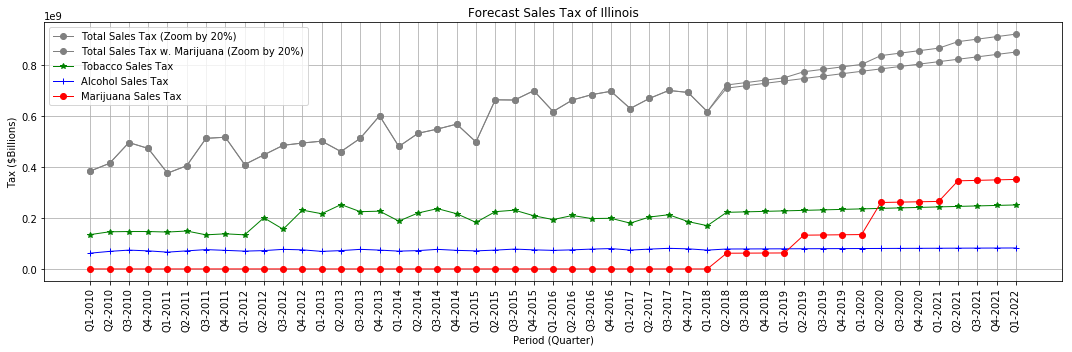

In [16]:
# Plot the forecast data
zoom_out = 5  # Zoom out the Total Sales data
x_axis = np.arange(len(df_forecast))
lt_period = df_forecast.index.tolist()

ss_forecast_ttl         = df_forecast["Total Sales Tax"] / zoom_out
ss_forecast_ttl_w_marij = df_forecast["Total Sales Tax (Forecast w. Marijuana)"] / zoom_out
ss_forecast_tbc         = df_forecast["Total Tobacco Sales Tax"]
ss_forecast_alc         = df_forecast["Total Alcohol Sales Tax"]
ss_marij_forecast       = df_forecast["Marijuana Sales Tax (Forecast Avg)"]

# Create a handle for each plot
ss_forecast_ttl.plot(label="Total Sales Tax (Zoom by 20%)",
                     marker="o", color="grey", linewidth=1)
ss_forecast_ttl_w_marij.plot(label="Total Sales Tax w. Marijuana (Zoom by 20%)",
                             marker="o", color="grey", linewidth=1)
ss_forecast_tbc.plot(label="Tobacco Sales Tax",
                     marker="*", color="Green", linewidth=1, figsize=(15,5))
ss_forecast_alc.plot(label="Alcohol Sales Tax",
                     marker="+", color="blue", linewidth=1, figsize=(15,5))
ss_marij_forecast.plot(label="Marijuana Sales Tax",
                       marker="o", color="Red", linewidth=1, figsize=(15,5))

# Set labels
plt.xticks(x_axis, lt_period, rotation="vertical")
plt.title(f"Forecast Sales Tax of {s_state}")
plt.xlabel("Period (Quarter)")
plt.ylabel("Tax ($Billions)")
plt.legend()

# Set sizes
plt.grid()
plt.tight_layout()

# Save and show
plt.savefig(pngfile_tax_curve)
plt.show()


In [17]:
# Convert Quarterly forcast revenues to Yearly forecast revenue for the Pie-charts

lt_quarters = ["Q1", "Q2", "Q3", "Q4"]
lt_year = []
lt_yearly_ttl = []
lt_yearly_tbc   = []
lt_yearly_alc   = []
lt_yearly_marij     = []
n_yearly_ttl  = 0
n_yearly_tbc    = 0
n_yearly_alc    = 0
n_yearly_marij      = 0

for index, row in df_forecast.iterrows():

    if row["Marijuana Sales Tax (Forecast Avg)"] != 0:
        s_cache = str(index)
        s_quarter = s_cache.split("-")[0]
        s_year    = s_cache.split("-")[1]
        n_yearly_ttl   += row["Total Sales Tax (Forecast w. Marijuana)"]
        n_yearly_tbc   += row["Total Tobacco Sales Tax"]
        n_yearly_alc   += row["Total Alcohol Sales Tax"]
        n_yearly_marij += row["Marijuana Sales Tax (Forecast Avg)"]

        if s_quarter == "Q4":
            lt_year.append(s_year)
            lt_yearly_ttl.append(n_yearly_ttl)
            lt_yearly_tbc.append(n_yearly_tbc)
            lt_yearly_alc.append(n_yearly_alc)
            lt_yearly_marij.append(n_yearly_marij)
            n_yearly_ttl   = 0
            n_yearly_tbc   = 0
            n_yearly_alc   = 0
            n_yearly_marij = 0

# Create the output chart
df_output = pd.DataFrame({"Year": lt_year,
                          "State": s_state,
                          "Total Sales Tax": lt_yearly_ttl,
                          "Tobacco Sales Tax": lt_yearly_tbc,
                          "Alcohol Sales Tax": lt_yearly_alc,
                          "Marijuana Sales Tax": lt_yearly_marij })

df_output["Tobacco's Share of Total Sales Tax %"]   = df_output["Tobacco Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output["Alchohol's Share of Total Sales Tax %"]  = df_output["Alcohol Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output["Marijuana's Share of Total Sales Tax %"] = df_output["Marijuana Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output.to_csv(csvfile_output)
df_output

,Year,State,Total Sales Tax,Tobacco Sales Tax,Alcohol Sales Tax,Marijuana Sales Tax,Tobacco's Share of Total Sales Tax %,Alchohol's Share of Total Sales Tax %,Marijuana's Share of Total Sales Tax %
0,2018,Illinois,1.098536e+10,6.729866e+08,2.356905e+08,1.863065e+08,6.126216,2.145497,1.695953
1,2019,Illinois,1.552394e+10,9.245107e+08,3.180862e+08,4.632133e+08,5.955386,2.049004,2.983864
2,2020,Illinois,1.673990e+10,9.555909e+08,3.224659e+08,9.226007e+08,5.708464,1.926332,5.511388
3,2021,Illinois,1.788344e+10,9.866711e+08,3.268456e+08,1.309574e+09,5.517235,1.827644,7.322831


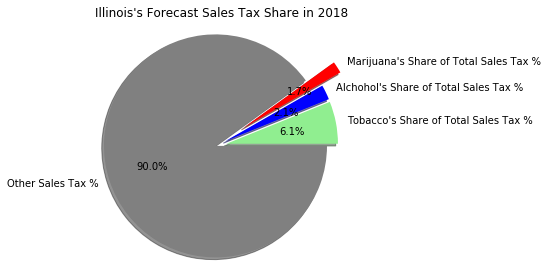

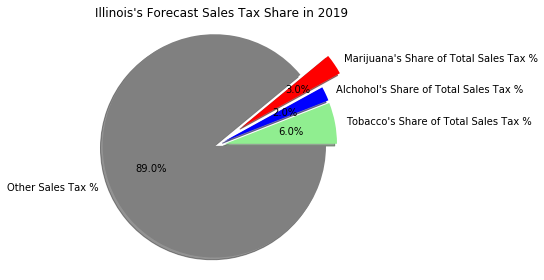

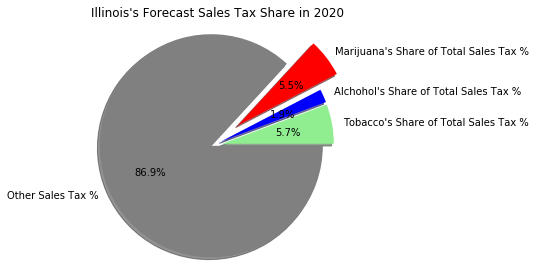

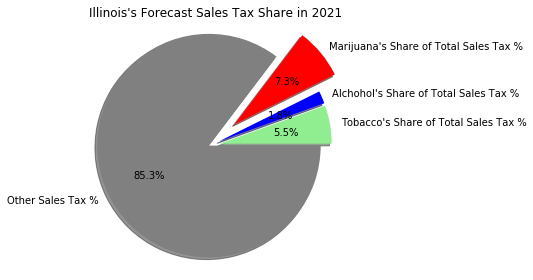

In [18]:
# Plot the Average forecasting sales tax share

lt_year = df_output["Year"].tolist()

for pie_year in lt_year:

    # Labels for the sections of our pie chart
    lt_labels = ["Tobacco's Share of Total Sales Tax %", 
                 "Alchohol's Share of Total Sales Tax %", 
                 "Marijuana's Share of Total Sales Tax %", 
                 "Other Sales Tax %"]

    # The values of each section of the pie chart
    lt_sizes = df_output.loc[(df_output["Year"]==pie_year), 
                             "Tobacco's Share of Total Sales Tax %"].tolist()
    lt_sizes.append(df_output.loc[(df_output["Year"]==pie_year), 
                             "Alchohol's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(df_output.loc[(df_output["Year"]==pie_year), 
                             "Marijuana's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(100-(lt_sizes[0]+lt_sizes[1]+lt_sizes[2]))

    # The colors of each section of the pie chart
    lt_colors = ["lightgreen", "blue", "red", "gray"]
    # Tells matplotlib to seperate sections
    list_explode = (0.1, 0.1, 0.3, 0)

    # Creates the pie chart with automatic percentages value created
    plt.pie(lt_sizes, explode=list_explode, labels=lt_labels, colors=lt_colors,
            autopct="%1.1f%%", shadow=True, startangle=0)
    plt.axis("equal")
    plt.title(f"{s_state}'s Forecast Sales Tax Share in {pie_year}")
    plt.tight_layout()

    # Save and show
    plt.savefig(f"{pngfile_tax_pie}_{pie_year}.png")
    plt.show()
